# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import nltk
import tensorflow as tf
from keras.layers import *
from tensorflow import *
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import *
import arabicstopwords.arabicstopwords as stp
from keras.preprocessing.sequence import pad_sequences
from nltk.stem import SnowballStemmer
import re
import os
from camel_tools.tokenizers.word import simple_word_tokenize
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from tashaphyne.stemming import ArabicLightStemmer
from sklearn.preprocessing import LabelEncoder
import warnings
from camel_tools.utils.dediac import dediac_ar
from camel_tools.utils.normalize import normalize_unicode
from camel_tools.utils.normalize import normalize_alef_maksura_ar
from camel_tools.utils.normalize import normalize_alef_ar
from camel_tools.utils.normalize import normalize_teh_marbuta_ar
import random
import emoji
from tashaphyne.stemming import ArabicLightStemmer
from wordcloud import WordCloud
import plotly.express as px
import arabic_reshaper
from bidi.algorithm import get_display
from nltk import pos_tag
from plotly import graph_objects as go
from collections import Counter
import string
pd.options.display.max_rows = 100
pd.options.display.max_columns =None 
random.seed(10)

In [2]:
colors1 = ['#c0d0a2','#a7bd7c']
colors2 = ['#bdd390', '#e9f0da']
color3 = ['Salmon', 'FireBrick', 'MediumVioletRed', 'Tomato', 'Orange', 'Gold', 'DarkKhaki', 'Lavender', 'Plum', 'LimeGreen', 'MediumSpringGreen', 'Green', 'DeepSkyBlue', 'Aquamarine', 'MediumSlateBlue']

# Download Some Packages

In [3]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/osamaanmar/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

# Ignore Warnings

In [4]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings(action='ignore')

# Read Data

In [5]:
Corpus = pd.read_csv('IMDBar.csv')
Corpus.rename(columns={'review': 'Text', 'sentiment': 'Sentiment'}, inplace=True)
Corpus.drop('Unnamed: 0', axis=1, inplace=True)
Corpus['Sentiment'] = Corpus['Sentiment'].str.capitalize()
Corpus

,Sentiment,Text
0,Negative,تعبت عدة محاولات للجلوس ومشاهدة البرنامج حيرني...
1,Negative,نشط لحظات قليلة العطاءات بشكل فعال مفصلات الرح...
2,Positive,فيلم للجميع الفيلم محبي كوميديا سوداء إشراك ري...
3,Negative,تقطعت السبل الفضاء نسخة طيار أفلام تلفزيوني جي...
4,Negative,قطعة المرغوب الفيلم كانت الفرضية يرام البداية ...
...,...,...
49995,Negative,اخترع ألفريد هيتشكوك نوع الإثارة يمكن تفكر وضع...
49996,Positive,العديد الآخرين كنت جذبت مزيج بولاك فورد وسكوت ...
49997,Negative,أتفق معظم عشاق كولومبو الفيلم تغييرا ضروري الت...
49998,Negative,أسوأ فيلم رأيته بيلي زين الفيلم بشكل أساسي لعر...


# Percantage Of Each Sentiment

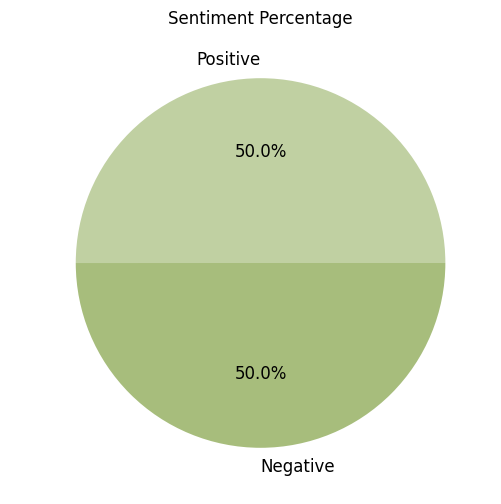

In [6]:
Corpus['Sentiment'].value_counts().plot.pie(autopct = '%0.1f%%',
                                                    textprops = {'size': 'large'},
                                                    title = 'Sentiment Percentage',
                                                    figsize = (6,6),
                                                    colors = colors1,
                                                    ylabel = ' ');

# Count Of Each Sentiment

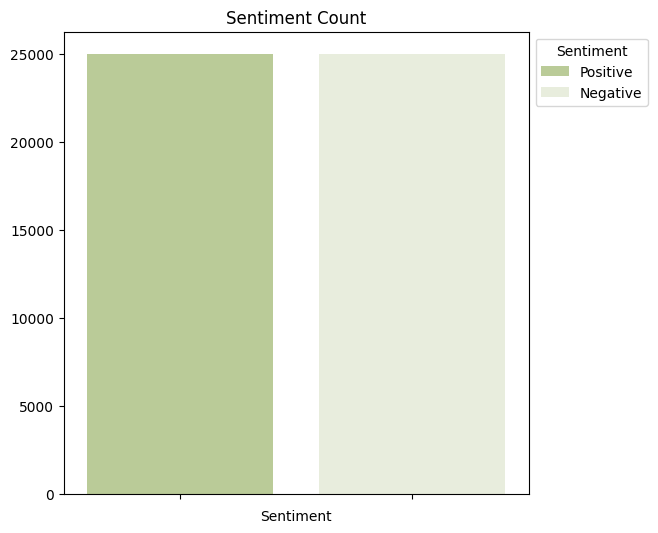

In [7]:
ax, fig = plt.subplots(figsize = (6,6))
ax =sns.countplot(x='Sentiment', data=Corpus, dodge=False, hue='Sentiment',  order= Corpus['Sentiment'].value_counts().index, hue_order =Corpus['Sentiment'].value_counts().index,  palette=colors2);
ax.set(xticklabels=[]) 
ax.set(ylabel=None) 
plt.title('Sentiment Count')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.show()

# Number Of Sentences

In [8]:
Corpus['NumberOfSentences'] = Corpus['Text'].apply(lambda n:len(nltk.tokenize.sent_tokenize(n)))
Corpus.drop(Corpus[ Corpus["NumberOfSentences"] == 0].index, inplace = True)
Corpus['NumberOfSentences'].sum()

50000

# Average Number Of Sentences

In [9]:
AverageNumberOfSentence = int(np.round(Corpus["NumberOfSentences"].mean()))
AverageNumberOfSentence

1

# Maximum Number Of Sentences

In [10]:
MaximumNumberOfSentence = Corpus["NumberOfSentences"].max()
MaximumNumberOfSentence

1

# Minimum Number Of Sentences

In [11]:
MinimumNumberOfSentence = Corpus["NumberOfSentences"].min()
MinimumNumberOfSentence

1

# POS Tagging (Parts of Speech Tagging)

In [12]:
Corpus['Tagged'] = Corpus['Text'].str.split().apply(pos_tag)
Corpus.reset_index(inplace=True, drop=True)
Corpus

,Sentiment,Text,NumberOfSentences,Tagged
0,Negative,تعبت عدة محاولات للجلوس ومشاهدة البرنامج حيرني...,1,"[(تعبت, JJ), (عدة, NNP), (محاولات, NNP), (للجل..."
1,Negative,نشط لحظات قليلة العطاءات بشكل فعال مفصلات الرح...,1,"[(نشط, JJ), (لحظات, NNP), (قليلة, NNP), (العطا..."
2,Positive,فيلم للجميع الفيلم محبي كوميديا سوداء إشراك ري...,1,"[(فيلم, JJ), (للجميع, NNP), (الفيلم, NNP), (مح..."
3,Negative,تقطعت السبل الفضاء نسخة طيار أفلام تلفزيوني جي...,1,"[(تقطعت, JJ), (السبل, NNP), (الفضاء, NNP), (نس..."
4,Negative,قطعة المرغوب الفيلم كانت الفرضية يرام البداية ...,1,"[(قطعة, JJ), (المرغوب, NNP), (الفيلم, NNP), (ك..."
...,...,...,...,...
49995,Negative,اخترع ألفريد هيتشكوك نوع الإثارة يمكن تفكر وضع...,1,"[(اخترع, JJ), (ألفريد, NNP), (هيتشكوك, NNP), (..."
49996,Positive,العديد الآخرين كنت جذبت مزيج بولاك فورد وسكوت ...,1,"[(العديد, JJ), (الآخرين, NNP), (كنت, NNP), (جذ..."
49997,Negative,أتفق معظم عشاق كولومبو الفيلم تغييرا ضروري الت...,1,"[(أتفق, JJ), (معظم, NNP), (عشاق, NNP), (كولومب..."
49998,Negative,أسوأ فيلم رأيته بيلي زين الفيلم بشكل أساسي لعر...,1,"[(أسوأ, JJ), (فيلم, NNP), (رأيته, NNP), (بيلي,..."


# Text Normalization

In [13]:
def remove_emojis(text):
     "Remove All Emojis From Text"
     text = emoji.replace_emoji(text, replace="")
     return text

def remove_hashtags(text):
     "Remove All Hashtags From Text"
     text =  re.sub("#[ا-ي٠-٩a-zA-Z0-9]+","", text)
     return text   

def remove_emails(text):
     "Remove All Emails From Text"
     text = re.sub("[a-zA-Z0-9-_.]+@[a-zA-Z]+.[a-zA-Z]+","", text)  
     return text    

def remove_url(text):
     "Remove All URL From Text"
     text = re.sub(r'http\S+', '', text, flags=re.MULTILINE)
     return text

def remove_mention(text):
     "Remove All Mention From Text"
     text = re.sub("@[ا-ي٠-٩a-zA-Z0-9]+","", text)
     return text

def remove_duplicate_char(text):
     "Remove Chars Word Has More Than 2 Same Following Char"
     text = re.sub(r'(.)\1+', r'\1\1', text)
     return text

def remove_single_char(text):
     "Remove Alone Chars From Text"
     text = ' '.join( [w for w in text.split() if len(w)>1] )
     return text

def remove_special_character_(text):
     "Remove Special Character From Text"
     Punctuations = '`؛،؟.,«»÷-' + string.punctuation
     for punctuation in Punctuations:
        text = text.replace(punctuation, ' ')
     return text   

def remove_new_line_char(text):
     "Remove New Line Symbols From Text"
     text = text.replace('\n', ' ')
     return text  
 
def remove_number(text):
     "Remove All Number From Text"
     text = re.sub(r'\d+', '', text)
     return text

def remove_html_tags(text):
    "Remove All HTL Tags From Text"
    text = re.sub("<.*?>", ' ', text)
    return text

def remove_arabic_diacritics_(text):
     "Remove Arabic Dediacritization"
     text = dediac_ar(text)
     return text

def normalize_arabic_unicode_(text):
     "Converts A Composed Character Into Its Decomposed Form"
     text = normalize_unicode(text)
     return text

def normalize_alef_maksura_ar_(text):
     "Normalize alef maksura 'ى' to yeh 'ي'"
     text = normalize_alef_maksura_ar(text)
     return text

def normalize_alef_ar_(text):
     "Normalize alef variants to 'ا'"
     text = normalize_alef_ar(text)
     return text

def normalize_teh_marbuta_ar_(text):
     "Normalize teh marbuta 'ة' to heh 'ه'"
     text = normalize_teh_marbuta_ar(text)
     return text

def remove_non_arabic(text):
    "Remove Non Arabic Word And Char"
    text = re.sub('[a-zA-Z]', '', text)
    return text

def remove_whitespace(text):
     "Remove Extra WhiteSpace"
     text = text.strip()
     return text 

def remove_unicode_characters_(text):
     "Remove Unicode Char"
     for character in text:
        if (ord(character) < 47) or ((ord(character) > 123 and ord(character) < 1568)) or ((ord(character) > 1641 and ord(character) < 8239)) :
         text = text.replace(character, ' ')
     return text

def stemmer_(text):
     "Lowers Inflection In Words To Their Root Forms"
     stemmer = SnowballStemmer('arabic')
     text = " ".join([stemmer.stem(word) for word in text.split()])
     return text


def remove_longest_than_(text):
     "Remove All Words That Longest Than The Longest Word In Arabic"
     for word in text.split():
          if len(word) >=16:
               text = text.replace(word, '')
     return text

def remove_stop_words(text):
     "Remove StopWords From Text"
     StopWords1 = set(stp.stopwords_list())
     StopWords2 = set(open('ArabicStopWord.txt','r', encoding='Utf-8').read().split('\n'))
     StopWords = StopWords1.union(StopWords2)
     text = simple_word_tokenize(text)
     text = [word for word in text if word not in StopWords]
     return ' '.join(text)

In [14]:
def text_normalization(text):
    text = remove_emojis(text) 
    text = remove_non_arabic(text)
    text = remove_duplicate_char(text)
    text = remove_number(text)
    text = remove_html_tags(text)
    text = normalize_arabic_unicode_(text)
    text = remove_single_char(text)
    text = remove_special_character_(text)
    text = remove_stop_words(text)
    text = normalize_alef_ar(text)
    text = normalize_alef_maksura_ar(text)
    text = normalize_teh_marbuta_ar(text)
    text = remove_arabic_diacritics_(text)
    text = remove_longest_than_(text)
    text = remove_new_line_char(text)
    text = remove_whitespace(text)
    text = stemmer_(text)
    return ''.join(text)

In [15]:
Corpus['Normalized_Text'] = Corpus['Text'].apply(text_normalization)
Corpus

,Sentiment,Text,NumberOfSentences,Tagged,Normalized_Text
0,Negative,تعبت عدة محاولات للجلوس ومشاهدة البرنامج حيرني...,1,"[(تعبت, JJ), (عدة, NNP), (محاولات, NNP), (للجل...",تعب محاول جلوس مشاهد برنامج حير استطع وضع اصبع...
1,Negative,نشط لحظات قليلة العطاءات بشكل فعال مفصلات الرح...,1,"[(نشط, JJ), (لحظات, NNP), (قليلة, NNP), (العطا...",نشط لحظ قليل عطاء عال مفصل رحل داخليه واضحه فض...
2,Positive,فيلم للجميع الفيلم محبي كوميديا سوداء إشراك ري...,1,"[(فيلم, JJ), (للجميع, NNP), (الفيلم, NNP), (مح...",يلم جميع فيلم محب وميد سوداء اشر ريتشارد دريفو...
3,Negative,تقطعت السبل الفضاء نسخة طيار أفلام تلفزيوني جي...,1,"[(تقطعت, JJ), (السبل, NNP), (الفضاء, NNP), (نس...",تقطع سبل فضاء نسخ طيار افلام تلفز جيد اشميزاز ...
4,Negative,قطعة المرغوب الفيلم كانت الفرضية يرام البداية ...,1,"[(قطعة, JJ), (المرغوب, NNP), (الفيلم, NNP), (ك...",قطع مرغوب فيلم فرضيه يرام بدايه اثار اندمج عمل...
...,...,...,...,...,...
49995,Negative,اخترع ألفريد هيتشكوك نوع الإثارة يمكن تفكر وضع...,1,"[(اخترع, JJ), (ألفريد, NNP), (هيتشكوك, NNP), (...",اخترع فريد هيتش نوع اثاره تفكر وضع معايير عال ...
49996,Positive,العديد الآخرين كنت جذبت مزيج بولاك فورد وسكوت ...,1,"[(العديد, JJ), (الآخرين, NNP), (كنت, NNP), (جذ...",عديد اخر جذب مزيج بول ورد سكو توماس استمتع عمل...
49997,Negative,أتفق معظم عشاق كولومبو الفيلم تغييرا ضروري الت...,1,"[(أتفق, JJ), (معظم, NNP), (عشاق, NNP), (كولومب...",اتفق عشاق ولومب فيلم تغيير تنسيق ولومب شرط ريد...
49998,Negative,أسوأ فيلم رأيته بيلي زين الفيلم بشكل أساسي لعر...,1,"[(أسوأ, JJ), (فيلم, NNP), (رأيته, NNP), (بيلي,...",اسو يلم را بيل زين فيلم اساس لعرض قادم جدد علو...


# Number Of Unique Words

In [16]:
UniqueWords = set()
for word in Corpus['Normalized_Text'].str.split():
    UniqueWords.update(word)
len(UniqueWords)

70089

# WordCloud

In [17]:
def word_cloud_(Sentiment):
    text = str(Corpus[Corpus['Sentiment'] == Sentiment])
    text = arabic_reshaper.reshape(text)
    text = get_display(text)
    wordcloud = WordCloud(font_path='arial.ttf',background_color='white', mode='RGB',width=1200,height=600).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation='catrom')
    plt.axis("off")
    plt.title('Word Cloud For {} Sentiment'.format(Sentiment))
    plt.show()

**1-Positive**

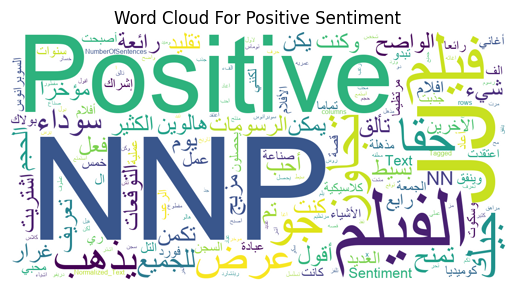

In [18]:
word_cloud_('Positive')

**2-Negative**

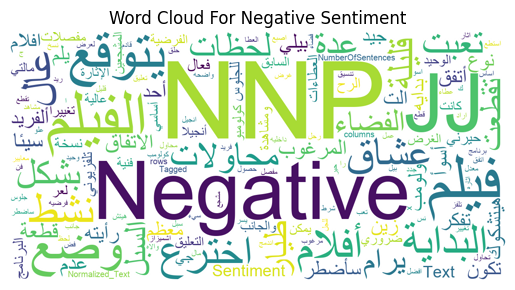

In [19]:
word_cloud_('Negative')

# Bigrams

In [20]:
Corpus['Bigrams'] = Corpus['Normalized_Text'].apply(lambda x: list(nltk.bigrams(x.split( ))))
Corpus['Bigrams'][100]

[('اقول', 'اعط'),
 ('اعط', 'فيلم'),
 ('فيلم', 'شخص'),
 ('شخص', 'مزدوج'),
 ('مزدوج', 'قيل'),
 ('قيل', 'مرار'),
 ('مرار', 'تكرار'),
 ('تكرار', 'يصم'),
 ('يصم', 'بدء'),
 ('بدء', 'تحدث'),
 ('تحدث', 'شخص'),
 ('شخص', 'عاد'),
 ('عاد', 'صعب'),
 ('صعب', 'وانغ'),
 ('وانغ', 'وجد'),
 ('وجد', 'اشميزاز'),
 ('اشميزاز', 'محترم'),
 ('محترم', 'حسن'),
 ('حسن', 'احصل'),
 ('احصل', 'مزاج'),
 ('مزاج', 'كثير'),
 ('كثير', 'فيلم'),
 ('فيلم', 'مجرد'),
 ('مجرد', 'قذر'),
 ('قذر', 'يلم'),
 ('يلم', 'اظهار'),
 ('اظهار', 'اولياء'),
 ('اولياء', 'امور'),
 ('امور', 'كبر'),
 ('كبر', 'اظهار'),
 ('اظهار', 'مراهق'),
 ('مراهق', 'شخص'),
 ('شخص', 'ناضج'),
 ('ناضج', 'مكا'),
 ('مكا', 'عمل'),
 ('عمل', 'عوده'),
 ('عوده', 'سلوك'),
 ('سلوك', 'صوتيه'),
 ('صوتيه', 'لحس'),
 ('لحس', 'الحظ'),
 ('الحظ', 'يحتو'),
 ('يحتو', 'موقع'),
 ('موقع', 'رجل'),
 ('رجل', 'سيد'),
 ('سيد', 'لاحظ'),
 ('لاحظ', 'شخص'),
 ('شخص', 'استوديو'),
 ('استوديو', 'مفترض'),
 ('مفترض', 'كاف'),
 ('كاف', 'تتم'),
 ('تتم', 'يرام'),
 ('يرام', 'صغير'),
 ('صغير', 'تقول'),
 ('تق

# Trigrams

In [21]:
Corpus['Trigrams'] = Corpus['Normalized_Text'].apply(lambda x: list(nltk.trigrams(x.split( ))))
Corpus['Trigrams'][100]

[('اقول', 'اعط', 'فيلم'),
 ('اعط', 'فيلم', 'شخص'),
 ('فيلم', 'شخص', 'مزدوج'),
 ('شخص', 'مزدوج', 'قيل'),
 ('مزدوج', 'قيل', 'مرار'),
 ('قيل', 'مرار', 'تكرار'),
 ('مرار', 'تكرار', 'يصم'),
 ('تكرار', 'يصم', 'بدء'),
 ('يصم', 'بدء', 'تحدث'),
 ('بدء', 'تحدث', 'شخص'),
 ('تحدث', 'شخص', 'عاد'),
 ('شخص', 'عاد', 'صعب'),
 ('عاد', 'صعب', 'وانغ'),
 ('صعب', 'وانغ', 'وجد'),
 ('وانغ', 'وجد', 'اشميزاز'),
 ('وجد', 'اشميزاز', 'محترم'),
 ('اشميزاز', 'محترم', 'حسن'),
 ('محترم', 'حسن', 'احصل'),
 ('حسن', 'احصل', 'مزاج'),
 ('احصل', 'مزاج', 'كثير'),
 ('مزاج', 'كثير', 'فيلم'),
 ('كثير', 'فيلم', 'مجرد'),
 ('فيلم', 'مجرد', 'قذر'),
 ('مجرد', 'قذر', 'يلم'),
 ('قذر', 'يلم', 'اظهار'),
 ('يلم', 'اظهار', 'اولياء'),
 ('اظهار', 'اولياء', 'امور'),
 ('اولياء', 'امور', 'كبر'),
 ('امور', 'كبر', 'اظهار'),
 ('كبر', 'اظهار', 'مراهق'),
 ('اظهار', 'مراهق', 'شخص'),
 ('مراهق', 'شخص', 'ناضج'),
 ('شخص', 'ناضج', 'مكا'),
 ('ناضج', 'مكا', 'عمل'),
 ('مكا', 'عمل', 'عوده'),
 ('عمل', 'عوده', 'سلوك'),
 ('عوده', 'سلوك', 'صوتيه'),
 ('سلوك', 'صوت

# Ngrams

In [22]:
Corpus['Ngrams'] = Corpus['Normalized_Text'].apply(lambda x: list(nltk.ngrams(x.split( ), 4)))
Corpus['Ngrams'][100]

[('اقول', 'اعط', 'فيلم', 'شخص'),
 ('اعط', 'فيلم', 'شخص', 'مزدوج'),
 ('فيلم', 'شخص', 'مزدوج', 'قيل'),
 ('شخص', 'مزدوج', 'قيل', 'مرار'),
 ('مزدوج', 'قيل', 'مرار', 'تكرار'),
 ('قيل', 'مرار', 'تكرار', 'يصم'),
 ('مرار', 'تكرار', 'يصم', 'بدء'),
 ('تكرار', 'يصم', 'بدء', 'تحدث'),
 ('يصم', 'بدء', 'تحدث', 'شخص'),
 ('بدء', 'تحدث', 'شخص', 'عاد'),
 ('تحدث', 'شخص', 'عاد', 'صعب'),
 ('شخص', 'عاد', 'صعب', 'وانغ'),
 ('عاد', 'صعب', 'وانغ', 'وجد'),
 ('صعب', 'وانغ', 'وجد', 'اشميزاز'),
 ('وانغ', 'وجد', 'اشميزاز', 'محترم'),
 ('وجد', 'اشميزاز', 'محترم', 'حسن'),
 ('اشميزاز', 'محترم', 'حسن', 'احصل'),
 ('محترم', 'حسن', 'احصل', 'مزاج'),
 ('حسن', 'احصل', 'مزاج', 'كثير'),
 ('احصل', 'مزاج', 'كثير', 'فيلم'),
 ('مزاج', 'كثير', 'فيلم', 'مجرد'),
 ('كثير', 'فيلم', 'مجرد', 'قذر'),
 ('فيلم', 'مجرد', 'قذر', 'يلم'),
 ('مجرد', 'قذر', 'يلم', 'اظهار'),
 ('قذر', 'يلم', 'اظهار', 'اولياء'),
 ('يلم', 'اظهار', 'اولياء', 'امور'),
 ('اظهار', 'اولياء', 'امور', 'كبر'),
 ('اولياء', 'امور', 'كبر', 'اظهار'),
 ('امور', 'كبر', 'اظهار', 'مراه

# Most Frequent Words 

In [23]:
MostFrequentWord = Counter((Corpus['Normalized_Text']).str.split().explode()).most_common(15)
MostFrequentWordDF = pd.DataFrame(MostFrequentWord, columns=('Word', 'Count'))
MostFrequentWordDF

,Word,Count
0,فيلم,117741
1,يلم,42568
2,شخص,37845
3,افلام,35967
4,مشاهد,27203
5,جيد,26335
6,كثير,25687
7,رايع,23667
8,قصه,23393
9,افضل,23184


In [24]:
fig = go.Figure(go.Funnel(
    y = MostFrequentWordDF['Word'].tolist(),
    x = MostFrequentWordDF['Count'].tolist(),
    marker = {"color": color3}))
fig.show()

In [25]:
fig = px.bar(MostFrequentWordDF, y='Word', x='Count',  orientation='h')
fig.show()

# Number Of Words 

In [26]:
Corpus["Number of Words"] = Corpus["Normalized_Text"].apply(lambda n:len(simple_word_tokenize(n)))
Corpus.drop(Corpus[ Corpus["Number of Words"] == 0].index, inplace = True)
Corpus["Number of Words"].sum()

5220457

# Number Of Charachters 

In [27]:
Corpus["Number of Charachters"] = Corpus["Normalized_Text"].str.len()
Corpus["Number of Charachters"].sum()

26049130

# Average Number Of Words 

In [28]:
AverageNaumberOfWords = int(np.round((Corpus["Number of Words"].mean())))
AverageNaumberOfWords

104

# Average Number Of Charachters 

In [29]:
AverageNumberOfCharachters = int(np.round(Corpus["Number of Charachters"].mean()))
AverageNumberOfCharachters

521

# Maximum Number Of Word

In [30]:
MaximumNaumberOfWords = Corpus["Number of Words"].max()
MaximumNaumberOfWords

1121

# Maximum Number Of Charachters 

In [31]:
MaximumNumberOfCharachters = Corpus['Number of Charachters'].max() 
MaximumNumberOfCharachters

5472

# Minimum Number Of Words

In [32]:
MimimumNaumberOfWords = Corpus["Number of Words"].min()
MimimumNaumberOfWords

3

# Minimum Number Of Charachters 

In [33]:
MinimumNumberOfCharachters = int(Corpus['Number of Charachters'].mean() )
MinimumNumberOfCharachters

520

# Split The DataSet Into Independent Variables , And Dependent Variable (Y)

In [34]:
X= Corpus['Normalized_Text']
y = Corpus['Sentiment']

# Label Encoder

In [35]:
y = LabelEncoder().fit_transform(y)

# Split The Dataset Into Training And Testing

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=30)

# TfidfVectorizer

In [37]:
Tfidf = TfidfVectorizer()
X_train_Tfidf = Tfidf.fit_transform(X_train)
X_test_Tfidf = Tfidf.transform(X_test)

In [38]:
vocab = Tfidf.vocabulary_
vocab

{'قراء': 32932,
 'روايه': 20672,
 'تستند': 11122,
 'تعتقد': 11912,
 'زوج': 22097,
 'واب': 51328,
 'فيلم': 32595,
 'سقط': 24432,
 'طريق': 28936,
 'كتاب': 33927,
 'استعداد': 2826,
 'كلم': 34917,
 'جيد': 15622,
 'كبير': 33920,
 'دقه': 18218,
 'يصور': 57730,
 'فوض': 32438,
 'انش': 6233,
 'غزو': 30694,
 'سوفيت': 25291,
 'افغانست': 4323,
 'سرع': 24257,
 'عرض': 29619,
 'نظام': 48515,
 'طالب': 28808,
 'متسامح': 39452,
 'ساقوم': 22700,
 'تقييم': 12470,
 'قصه': 33122,
 'بشريه': 8434,
 'امريكيه': 5532,
 'افغانيه': 4324,
 'عاد': 29246,
 'بلاد': 8661,
 'انقاذ': 6408,
 'نجل': 47912,
 'زميل': 22026,
 'مرحل': 41623,
 'طفوله': 28982,
 'اجراء': 869,
 'عدد': 29534,
 'وان': 53223,
 'اخبر': 1264,
 'اقناع': 4561,
 'كثير': 34009,
 'جزء': 14814,
 'اكثر': 4654,
 'اثار': 745,
 'مسابق': 42005,
 'ورقيه': 54177,
 'ابول': 333,
 'لاحق': 35703,
 'مصغر': 42995,
 'يفورن': 58156,
 'تعادل': 11853,
 'ارق': 2140,
 'مال': 38578,
 'احبب': 1003,
 'لسبب': 36552,
 'جيف': 15716,
 'امشاط': 5552,
 'رايع': 19862,
 'يلعب': 58572,
 '

# Models

In [39]:
def models_(model_name):
    model = model_name
    model.fit(X_train_Tfidf, y_train)
    y_pred = model.predict(X_test_Tfidf)
    return y_pred

# Confusion Matrix

In [40]:
def confusion_matrix_(Real, Prediction):
        ConfusionMatrix = confusion_matrix(Real, Prediction)
        return ConfusionMatrix

# Generate True Positive, False Positive, True Negative, False Negative

In [41]:
def positive_negative(Confusin_Matrix):
    False_Postive = Confusin_Matrix[0, 1]

    True_Positive = Confusin_Matrix[0, 0]

    False_Negative = Confusin_Matrix[1, 0]
    
    True_Negative = Confusin_Matrix[1, 1]

    return False_Postive, True_Positive, False_Negative, True_Negative

# Performance Merics

In [42]:
def performance_metrics(False_Postive, True_Positive, False_Negative, True_Negative):
     Accuracy = (True_Positive + True_Negative) / (True_Positive + True_Negative + False_Postive + False_Negative)
     Precision = True_Positive / (True_Positive+ False_Postive)
     Sensitivity = True_Positive / (True_Positive  + False_Negative)
     Specificity = True_Negative / (True_Negative + False_Negative)
     F1Score = (True_Positive) / ((True_Positive) + (0.5 *(False_Postive + False_Negative)))
     Error = 1 - Accuracy
     MetricsValues = pd.DataFrame(index=['Accuracy', 'Precision', 'Sensitivity', 'Specificity', 'F1Score', 'Error'], columns=['Values'], data=[Accuracy, Precision, Sensitivity, Specificity, F1Score, Error])
     return MetricsValues


# Machine Learning

**1. Naive Bayes**

In [43]:
model_name1 = MultinomialNB()
y_pred1 = models_(model_name1)

In [44]:
cm1 = confusion_matrix_(y_test, y_pred1)

In [45]:
False_Postive, True_Positive, False_Negative, True_Negative = positive_negative(cm1)

In [46]:
MetricsValues1 = performance_metrics(False_Postive, True_Positive, False_Negative, True_Negative)

In [47]:
MetricsValues1

,Values
Accuracy,0.841533
Precision,0.834826
Sensitivity,0.849484
Specificity,0.848407
F1Score,0.842091
Error,0.158467


**2. Logistic Regression**

In [48]:
model_name2 = LogisticRegression()
y_pred2 = models_(model_name2)

In [49]:
cm2 = confusion_matrix_(y_test, y_pred2)

In [50]:
False_Postive2, True_Positive2, False_Negative2, True_Negative2 = positive_negative(cm2)
MetricsValues2 = performance_metrics(False_Postive2, True_Positive2, False_Negative2, True_Negative2)
MetricsValues2

,Values
Accuracy,0.869600
Precision,0.852081
Sensitivity,0.885922
Specificity,0.887554
F1Score,0.868672
Error,0.130400


**3. Decision Tree**

In [51]:
model_name3 = DecisionTreeClassifier(criterion = 'entropy')
y_pred3 = models_(model_name3)

In [52]:
cm3 = confusion_matrix_(y_test, y_pred3)

In [53]:
False_Postive3, True_Positive3, False_Negative3, True_Negative3 = positive_negative(cm3)
MetricsValues3 = performance_metrics(False_Postive3, True_Positive3, False_Negative3, True_Negative3)
MetricsValues3

,Values
Accuracy,0.713333
Precision,0.714041
Sensitivity,0.718013
Specificity,0.712608
F1Score,0.716022
Error,0.286667


**4. K Nearest Neighbor**

In [54]:
model_name4 = KNeighborsClassifier(metric='cosine', n_neighbors=5)
y_pred4 = models_(model_name4)

In [55]:
cm4 = confusion_matrix_(y_test, y_pred4)

In [56]:
False_Postive4, True_Positive4, False_Negative4, True_Negative4 = positive_negative(cm4)
MetricsValues4 = performance_metrics(False_Postive4, True_Positive4, False_Negative4, True_Negative4)
MetricsValues4

,Values
Accuracy,0.733733
Precision,0.659905
Sensitivity,0.780131
Specificity,0.809395
F1Score,0.714999
Error,0.266267


**5. Random Forest**

In [57]:
model_name5 = RandomForestClassifier(criterion = 'entropy', n_estimators=100)
y_pred5 = models_(model_name5)

In [58]:
cm5 = confusion_matrix_(y_test, y_pred5)

In [59]:
False_Postive5, True_Positive5, False_Negative5, True_Negative5 = positive_negative(cm5)
MetricsValues5 = performance_metrics(False_Postive5, True_Positive5, False_Negative5, True_Negative5)
MetricsValues5

,Values
Accuracy,0.836867
Precision,0.836802
Sensitivity,0.840233
Specificity,0.836933
F1Score,0.838514
Error,0.163133


**6.SGD Classifier**

In [60]:
model_name6 = SGDClassifier(loss='hinge')
y_pred6 = models_(model_name6)

In [61]:
cm6 = confusion_matrix_(y_test, y_pred6)

In [62]:
False_Postive6, True_Positive6, False_Negative6, True_Negative6 = positive_negative(cm6)
MetricsValues6 = performance_metrics(False_Postive6, True_Positive6, False_Negative6, True_Negative6)
MetricsValues6

,Values
Accuracy,0.867467
Precision,0.842334
Sensitivity,0.889925
Specificity,0.893224
F1Score,0.865476
Error,0.132533


# Deep Learning

In [63]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
embedding_dim = 16
vocab_size = len(tokenizer.word_index) + 1

In [64]:
vocab_size

59680

In [65]:
X_train_seqs = tokenizer.texts_to_sequences(X_train)
X_test_seqs = tokenizer.texts_to_sequences(X_test)
max_length = len(max(X_train_seqs, key=len))

In [66]:
max_length

1121

In [67]:
encoded_X_train = sequence.pad_sequences(X_train_seqs, maxlen=max_length)
encoded_X_test = sequence.pad_sequences(X_test_seqs, maxlen=max_length)

In [68]:
Callback = tf.keras.callbacks.EarlyStopping(
                    monitor="accuracy",
                    mode="max",
                    start_from_epoch=5
                )

**8-Convolutional Neural Network**

In [69]:
model = tf.keras.Sequential([
                Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
                Conv1D(filters=32, kernel_size = 3, activation='relu'),
                GlobalAveragePooling1D(),
                Dropout(0.8),
                Dense(1, activation= 'sigmoid')
                ])

In [70]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [71]:
history = model.fit(encoded_X_train, y_train,
                    epochs=15,
                    validation_data=(encoded_X_test, y_test),
                    batch_size=16,
                    callbacks=[Callback])

Epoch 1/15
2188/2188 [==============================] - 123s 56ms/step - loss: 0.5632 - accuracy: 0.7279 - val_loss: 0.3966 - val_accuracy: 0.8572
Epoch 2/15
2188/2188 [==============================] - 88s 40ms/step - loss: 0.3462 - accuracy: 0.8641 - val_loss: 0.3377 - val_accuracy: 0.8685
Epoch 3/15
2188/2188 [==============================] - 61s 28ms/step - loss: 0.2879 - accuracy: 0.8892 - val_loss: 0.3239 - val_accuracy: 0.8710
Epoch 4/15
2188/2188 [==============================] - 36s 16ms/step - loss: 0.2506 - accuracy: 0.9053 - val_loss: 0.3163 - val_accuracy: 0.8723
Epoch 5/15
2188/2188 [==============================] - 36s 16ms/step - loss: 0.2199 - accuracy: 0.9207 - val_loss: 0.3199 - val_accuracy: 0.8714
Epoch 6/15
2188/2188 [==============================] - 35s 16ms/step - loss: 0.1972 - accuracy: 0.9282 - val_loss: 0.3259 - val_accuracy: 0.8691
Epoch 7/15
2188/2188 [==============================] - 35s 16ms/step - loss: 0.1756 - accuracy: 0.9385 - val_loss: 0.3377 

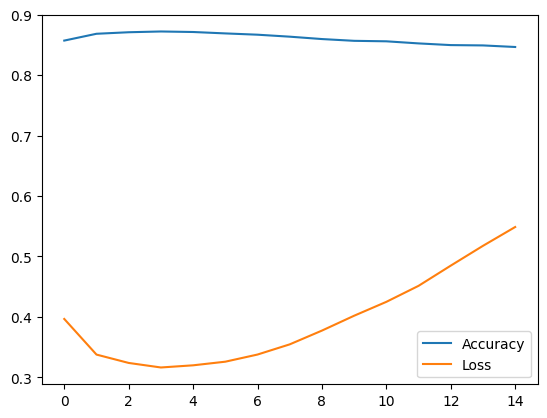

In [72]:
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.plot(val_acc, label='Accuracy')
plt.plot(val_loss, label='Loss')
plt.legend()
plt.show()

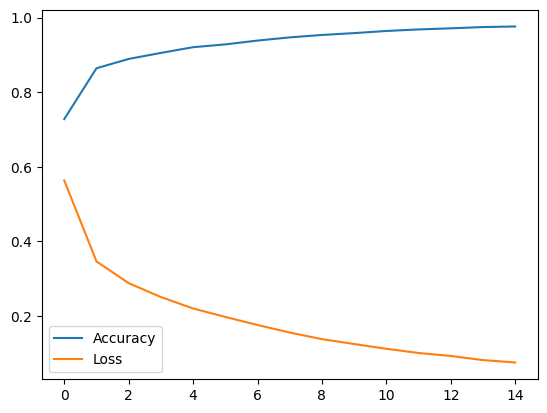

In [73]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.plot(acc, label='Accuracy')
plt.plot(loss, label='Loss')
plt.legend()
plt.show()

In [74]:
loss, accuracy = model.evaluate(encoded_X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(encoded_X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9935
Testing Accuracy:  0.8466


**9-Recurrent Neural Networks**

In [75]:
model = tf.keras.Sequential([
        Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
        LSTM(32, return_sequences=False),  
        Dropout(0.2),      
        Dense(1, activation='sigmoid')])

In [76]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [77]:
history = model.fit(encoded_X_train, y_train,
                    epochs=15,
                    validation_data=(encoded_X_test, y_test),
                    batch_size=16,
                    callbacks=[Callback])

Epoch 1/15
2188/2188 [==============================] - 245s 111ms/step - loss: 0.3969 - accuracy: 0.8167 - val_loss: 0.3397 - val_accuracy: 0.8542
Epoch 2/15
2188/2188 [==============================] - 221s 101ms/step - loss: 0.2375 - accuracy: 0.9079 - val_loss: 0.3372 - val_accuracy: 0.8564
Epoch 3/15
2188/2188 [==============================] - 211s 97ms/step - loss: 0.1626 - accuracy: 0.9389 - val_loss: 0.3868 - val_accuracy: 0.8502
Epoch 4/15
2188/2188 [==============================] - 209s 96ms/step - loss: 0.1100 - accuracy: 0.9604 - val_loss: 0.4463 - val_accuracy: 0.8446
Epoch 5/15
2188/2188 [==============================] - 210s 96ms/step - loss: 0.0776 - accuracy: 0.9727 - val_loss: 0.5389 - val_accuracy: 0.8446
Epoch 6/15
2188/2188 [==============================] - 215s 98ms/step - loss: 0.0644 - accuracy: 0.9791 - val_loss: 0.5793 - val_accuracy: 0.8408
Epoch 7/15
2188/2188 [==============================] - 215s 98ms/step - loss: 0.0359 - accuracy: 0.9882 - val_loss:

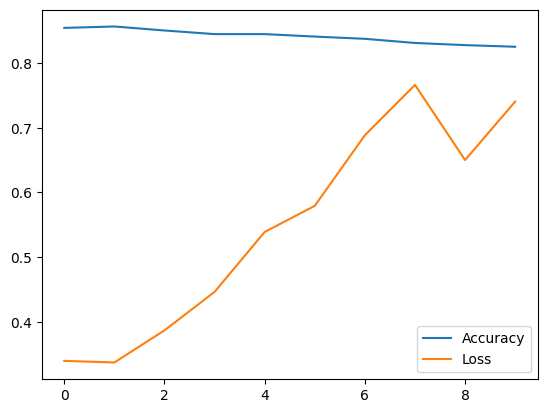

In [78]:
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.plot(val_acc, label='Accuracy')
plt.plot(val_loss, label='Loss')
plt.legend()
plt.show()

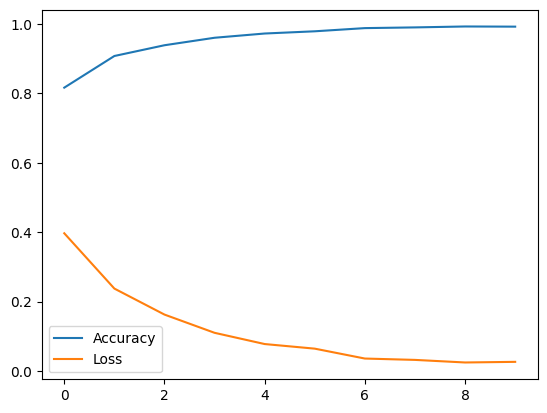

In [79]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.plot(acc, label='Accuracy')
plt.plot(loss, label='Loss')
plt.legend()
plt.show()

In [80]:
loss, accuracy = model.evaluate(encoded_X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(encoded_X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9951
Testing Accuracy:  0.8251
